In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

pd.options.mode.chained_assignment = None  # default='warn'

# Titanic 

In [73]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [74]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
X_train = train.loc[:,"Pclass":"Embarked"]
target = train.loc[:, "Survived"]
X_test = test

In [76]:
X_train.isna().sum()

Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [77]:
X_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [78]:
X_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [79]:
# Creating new feature family size from sipsp and parch 
X_train['Family_Size'] = X_train['SibSp'] + X_train['Parch'] + 1
X_test['Family_Size'] = X_test['SibSp'] + X_test['Parch'] + 1

* Drop Ticket, Cabin and PassengerId

In [80]:
X_train = X_train.drop(columns=['Ticket', 'Cabin'])
X_test = X_test.drop(columns=['Ticket', 'Cabin', 'PassengerId'])

* Fill missing value in 'Embarked' and 'Fare'

In [81]:
X_train['Embarked'] = X_train['Embarked'].fillna('S')
X_test['Embarked'] = X_test['Embarked'].fillna('S')
X_train['Fare'] = X_train['Fare'].fillna(X_train['Fare'].mean(), axis = 0)
X_test['Fare'] = X_test['Fare'].fillna(X_test['Fare'].mean(), axis = 0)
print(X_train.isnull().sum())
print("")
print(X_test.isnull().sum())

Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
Family_Size      0
dtype: int64

Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            0
Embarked        0
Family_Size     0
dtype: int64


<AxesSubplot:>

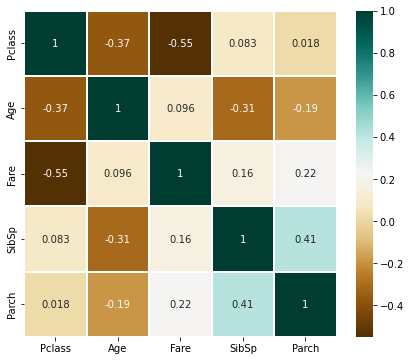

In [82]:
corr_matrix = X_train[['Pclass', 'Age', 'Fare', 'Sex', 'SibSp', 'Parch']].corr()
plt.figure(figsize=(7, 6))
sns.heatmap(data = corr_matrix, cmap='BrBG', annot=True, linewidths=0.2)

* Process Age for X_train

In [83]:
NaN_indexes = X_train['Age'][X_train['Age'].isna()].index

X_train.reset_index(inplace=True, drop=True)

for i in NaN_indexes:
    pred_age = X_train['Age'][(X_train.SibSp == X_train.iloc[i]["SibSp"]) 
        & (X_train.Parch == X_train.iloc[i]["Parch"])
        & (X_train.Pclass == X_train.iloc[i]["Pclass"])].mean()
    if not np.isnan(pred_age):
        X_train['Age'].iloc[i] = pred_age
    else:               
        X_train['Age'].iloc[i] = X_train['Age'].mean()
X_train.isna().sum()

Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Family_Size    0
dtype: int64

* Process Age for X_test

In [84]:
NaN_indexes = X_test['Age'][X_test['Age'].isna()].index

X_test.reset_index(inplace=True, drop=True)

for i in NaN_indexes:
    pred_age = X_test['Age'][(X_test.SibSp == X_test.iloc[i]["SibSp"]) 
        & (X_test.Parch == X_test.iloc[i]["Parch"])       
        & (X_test.Pclass == X_test.iloc[i]["Pclass"])].mean()
    if not np.isnan(pred_age):
        X_test['Age'].iloc[i] = pred_age
    else:
        X_test['Age'].iloc[i] = X_test['Age'].mean()

X_test.isna().sum()

Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Family_Size    0
dtype: int64

* Name Processing: Extracting new class 'Title'

In [85]:
data = [X_train, X_test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
X_train = X_train.drop(['Name'], axis=1)
X_test = X_test.drop(['Name'], axis=1)

* One-hot encoding, transforming categorical variables into a form that could be provided to ML algorithms to do a better prediction.

In [86]:
X_train = pd.get_dummies(X_train, columns=['Sex', 'Embarked', 'Pclass'])
X_test = pd.get_dummies(X_test, columns=['Sex', 'Embarked', 'Pclass'])

<AxesSubplot:xlabel='Title', ylabel='count'>

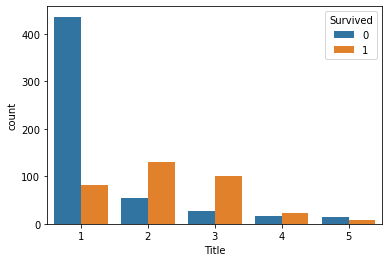

In [87]:
X_train_cp = X_train.copy()
X_train_cp.insert(2, 'Survived', target, True)
sns.countplot(data = X_train_cp, x = 'Title', hue = 'Survived')

Text(0, 0.5, 'Survival Probability')

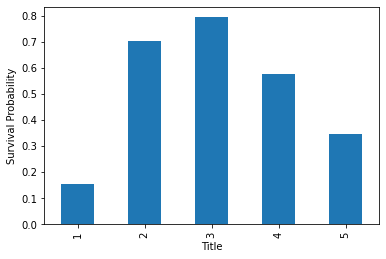

In [88]:
plt1 = X_train_cp[['Title', 'Survived']].groupby('Title').mean().Survived.plot(kind = 'bar', )
plt1.set_xlabel('Title')
plt1.set_ylabel('Survival Probability')

In [89]:
X_train_cp[['Title', 'Survived']].groupby('Title').sum()

,Survived
Title,
1,81
2,130
3,100
4,23
5,8


In [90]:
X_train

,Age,SibSp,Parch,Fare,Family_Size,Title,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,7.2500,2,1,0,1,0,0,1,0,0,1
1,38.0,1,0,71.2833,2,3,1,0,1,0,0,1,0,0
2,26.0,0,0,7.9250,1,2,1,0,0,0,1,0,0,1
3,35.0,1,0,53.1000,2,3,1,0,0,0,1,1,0,0
4,35.0,0,0,8.0500,1,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,1,5,0,1,0,0,1,0,1,0
887,19.0,0,0,30.0000,1,2,1,0,0,0,1,1,0,0
888,13.5,1,2,23.4500,4,2,1,0,0,0,1,0,0,1
889,26.0,0,0,30.0000,1,1,0,1,1,0,0,1,0,0


<AxesSubplot:>

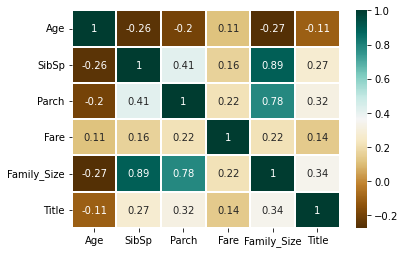

In [91]:
corr_matrix1 = X_train[['Age',"SibSp", "Parch", "Fare", "Family_Size", "Title"]].corr()
sns.heatmap(data = corr_matrix1, cmap='BrBG', annot=True, linewidths=0.2)

* Split data

In [92]:
x_train, x_test, y_train, y_test = train_test_split(X_train, target, test_size = 0.2, random_state = 0)

**SMOTE Technique**
* Since the number of not survived passengers is more than survived passengers, oversampling is carried out to avoid overfitting.

In [93]:
# from imblearn.over_sampling import SMOTE
# x_train, y_train = SMOTE().fit_resample(x_train, y_train)

* Feature Scaling

In [94]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = x_train.copy()
x_test_sc = x_test.copy()
x_train_sc.iloc[:, 0:6] = sc.fit_transform(x_train.iloc[:, 0:6])
x_test_sc.iloc[:, 0:6] = sc.fit_transform(x_test.iloc[:, 0:6])

In [95]:
from sklearn.preprocessing import MinMaxScaler
mc = MinMaxScaler()
x_train_nc = x_train.copy()
x_test_nc = x_test.copy()
x_train_nc.iloc[:, 0:6] = mc.fit_transform(x_train.iloc[:, 0:6])
x_test_nc.iloc[:, 0:6] = mc.fit_transform(x_test.iloc[:, 0:6])

In [96]:
print(x_train_sc)
print(x_test_sc)

          Age     SibSp     Parch      Fare  Family_Size     Title  \
140 -0.668538 -0.464452  1.959264 -0.331679     0.648534  1.301646   
439  0.105227 -0.464452 -0.477410 -0.426405    -0.553956 -0.702185   
817  0.105227  0.412710  0.740927  0.102620     0.648534 -0.702185   
378 -0.714054 -0.464452 -0.477410 -0.555896    -0.553956 -0.702185   
491 -0.639574 -0.464452 -0.477410 -0.491276    -0.553956 -0.702185   
..        ...       ...       ...       ...          ...       ...   
835  0.701067  0.412710  0.740927  1.023857     0.648534  0.299730   
192 -0.788534  0.412710 -0.477410 -0.479216     0.047289  0.299730   
629 -0.100669 -0.464452 -0.477410 -0.481629    -0.553956 -0.702185   
559  0.477627  0.412710 -0.477410 -0.288681     0.047289  1.301646   
684  2.265148  0.412710  0.740927  0.142456     0.648534 -0.702185   

     Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  Pclass_1  \
140           1         0           1           0           0         0   
439      

In [97]:
def models_run(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:    
    # dfs = []
    models = [
            ('LogReg', LogisticRegression(random_state=0)), 
            ('RF', RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 1)),
            ('KNN', KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)),
            ('SVM', SVC(kernel='linear', random_state=2)), 
            ('Kernel SVM', SVC(kernel='rbf', random_state=3)),
            ('NB', GaussianNB()),
            ('DT', DecisionTreeClassifier(criterion = "entropy", random_state = 0))
            ]
    results = []
    names = []
    # scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    # target_names = ['deceased', 'survived']
    for name, model in models:
        #   kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        #   cv_results = model_selection.cross_validate(model, X_train, y_train, scoring=scoring)
            clf = model.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            # print(name)
            names.append(name)
            # print(accuracy_score(y_test, y_pred))
            acc_results = accuracy_score(y_test, y_pred)
            # pre_results = precision_score(y_test, y_pred)
            results.append(np.array(acc_results))
            # results.append(np.array(pre_results))
            # print(classification_report(y_test, y_pred, target_names=target_names))
            # print(confusion_matrix(y_test, y_pred))
    final = pd.DataFrame(results, names)
    final.columns=['Accuracy']
    #final.sort_values(by = ['Accuracy'], inplace=True, ascending=False)
    # results.append(cv_results)
    # names.append(name)
    # this_df = pd.DataFrame(cv_results)
    # this_df['model'] = name
    # dfs.append(this_df)
    # final = pd.concat(dfs, ignore_index=True)
    return final

In [121]:
from sklearn.pipeline import Pipeline
clf1 = SVC(kernel='rbf', random_state=3)
clf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1)
pipe = Pipeline([('scaler', StandardScaler()), ('Random Forest', clf)])
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
print(accuracy_score(y_test, y_pred))
result = pipe.predict(X_test)

0.8379888268156425


In [122]:
output = {'PassengerId': test['PassengerId'], 'Survived':result }

In [123]:
pd.DataFrame(output).to_csv('submission.csv', index=False)

In [99]:
print('No Feature Scaling')
no_f = models_run(x_train, y_train, x_test, y_test)
no_f

c:\Users\PC10\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No Feature Scaling


,Accuracy
LogReg,0.782123
RF,0.832402
KNN,0.743017
SVM,0.782123
Kernel SVM,0.726257
NB,0.782123
DT,0.776536


In [100]:
print('Standardization')
std = models_run(x_train_sc, y_train, x_test_sc, y_test)
std

Standardization


,Accuracy
LogReg,0.787709
RF,0.821229
KNN,0.804469
SVM,0.759777
Kernel SVM,0.793296
NB,0.776536
DT,0.776536


In [101]:
print('Normalization')
nor = models_run(x_train_nc, y_train, x_test_nc, y_test)
nor

Normalization


,Accuracy
LogReg,0.798883
RF,0.832402
KNN,0.826816
SVM,0.765363
Kernel SVM,0.793296
NB,0.770950
DT,0.748603


In [102]:
result = pd.DataFrame(columns = ["LogReg","RF", "KNN",	"SVM","Kernel SVM","NB","DT"], index = ['None', 'Std', 'Nor'])

result.iloc[0,:] = no_f.iloc[:,0].values 
result.iloc[1,:] = std.iloc[:,0].values 
result.iloc[2,:] = nor.iloc[:,0].values 

result

,LogReg,RF,KNN,SVM,Kernel SVM,NB,DT
None,0.782123,0.832402,0.743017,0.782123,0.726257,0.782123,0.776536
Std,0.787709,0.821229,0.804469,0.759777,0.793296,0.776536,0.776536
Nor,0.798883,0.832402,0.826816,0.765363,0.793296,0.77095,0.748603


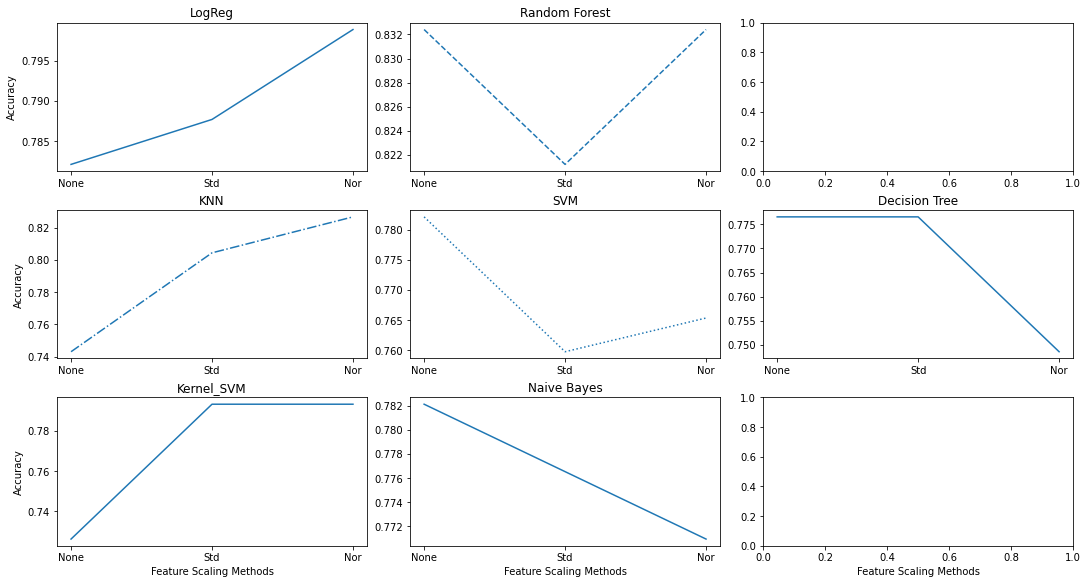

In [103]:
x = result.index

LogReg = result.iloc[:,0]
RF = result.iloc[:,1]
KNN = result.iloc[:,2]
SVM = result.iloc[:,3]
Kernel_SVM = result.iloc[:,4]
NB = result.iloc[:,5]
DT = result.iloc[:,6]

fig, ax = plt.subplots(3,3, figsize=(15,8), constrained_layout=True)

ax[0,0].plot(x, LogReg, label = "LogReg", linestyle="-")
ax[0,0].set_title('LogReg')

ax[0,1].plot(x, RF, label = "Random Forest", linestyle="--")
ax[0,1].set_title('Random Forest')

ax[1,0].plot(x, KNN, label = "KNN", linestyle="-.")
ax[1,0].set_title('KNN')

ax[1,1].plot(x, SVM, label = "SVM", linestyle=":")
ax[1,1].set_title('SVM')

ax[2,0].plot(x, Kernel_SVM, label = "Kernel_SVM")
ax[2,0].set_title('Kernel_SVM')

ax[2,1].plot(x, NB, label = "Naive Bayes")
ax[2,1].set_title('Naive Bayes')

ax[1,2].plot(x, DT, label = "Decision Tree")
ax[1,2].set_title('Decision Tree')

plt.setp(ax[-1, :], xlabel='Feature Scaling Methods')
plt.setp(ax[:, 0], ylabel='Accuracy')

plt.show()